In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, add_dummy_feature
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

Here we will implement different optimization algorithms. We will see how they work and compare them on the example of minimization of Logistic Loss function. 

Why did we choose Logistic Loss function? Logistic Loss is objective function in Logistic Regression - very popular ML algorithm.  

<div style="background-color: #eceff1; border-left: 0px solid #78909c; padding: 2em; border-radius: 5px;"> 

Minimization of the empirical risk $f$ of the $L_2$-regularized logistic regression model, on the dataset $(X_{\textrm{train}},y_{\textrm{train}})$:

$$
\begin{aligned}
\textrm{min}_{w\in \mathbb{R}^d} \  f(w) 
\ &= \ \textrm{min}_{w\in \mathbb{R}^d} \ \frac{1}{n_{\textrm{train}}} \sum_{i=1}^{n_{\textrm{train}}} f_i(w) \\
&= \ \textrm{min}_{w\in \mathbb{R}^d}\frac{1}{n_{\textrm{train}}} \sum_{i=1}^{n_{\textrm{train}}} \textrm{LogisticLoss}(y_i, \left\langle x_{i}, w\right\rangle ) + \frac{l_2}{2}\|w\|^{2}_2 \\ 
&= \ \textrm{min}_{w\in \mathbb{R}^d}\frac{1}{n_{\textrm{train}}} \sum_{i=1}^{n_{\textrm{train}}} \ln(1+\exp{(-y_i, \left\langle x_{i}, w\right\rangle)}) + \frac{l_2}{2}\|w\|^{2}_2,
\end{aligned}
$$

where $l_2 \ge 0$ is the $L_2$ regularization coefficient.
</div>

# Basic approach

### Gradient descent (GD)

At iteration k of the GD algorithm, the following update is executed:

$$
x_{k+1} \leftarrow x_{k} - \gamma\nabla f(x_k)
$$

Optimal step for $\mu$-strongly convex and $L$-smooth function is $ \gamma_{\mathrm{opt}} =  \frac{2}{\mu + L}$.

Pros and cons:
+ At each iteration we need to calculate full gradient, what is not efficient for large-scaled data
- Need to find a good step: for big steps we can jump over the min. For low - method will converge very slowly.

Convegence:

$$f\left(w_k\right)-f\left(w^*\right) = O\left(\frac{1}{K}\right)$$

# Variations of the method based on gradient estimation

### Stochastic Gradient Descent (SGD)

To solve previuosly mentioned problem we can use the following algorithm. At each iteration we do not calculcate full gradient, we calculate partial gradient on randomly chosen example from $X$.

At iteration k of the SGD algorithm, the following update is executed:

$$
\begin{cases}
i \textrm{ chosen randomly in } \{1...n\}\\
x_{k+1} \leftarrow x_{k} - \gamma_k \nabla f_i(x_k) \\
\end{cases}
$$

Optimal step for $\mu$-strongly convex and $L$-smooth function is $ \gamma_{\mathrm{opt}} = \frac{2}{L + \mu (k + 1)}$, where $k$ is number of iteration.

Pros and cons:
* Convergence rate drops compared to GD
* Faster calculations
* One example must be stored in memory in one iteration

Convegence:

$$f\left(w_k\right)-f\left(w^*\right) = O\left(\frac{1}{\sqrt{K}}\right)$$

## Approaches with reduction of gradient variance
For some functions direction of the gradient from step to can can vary a lot (functions with stretched level lines, for example), to reduce variance we can estimate gradient in a special way.

### Stochastic Gradient Descent Mini Batch(SGD-MB) 

At iteration k of the SGD algorithm, the following update is executed:

$$
\begin{cases}
i \textrm{ chosen randomly m times (size of MB) in } \{1...n\}\\
x_{k+1} \leftarrow x_{k} - \gamma_k \frac{1}{m} \big(\sum\limits_{i=1}^{m} \nabla f_i(x_k) \big) \\
\end{cases}
$$

Pros and cons:
* The same as SGD, but reduce variance of sgd


### SAGA (Stochastic Average Gradient "Amélioré")

The following method combines the low complexity of SGD and the high convergence rate of GD.


SAGA starts by computing a single batch gradient, then at iteration k, the following update is executed:

$$
\begin{cases}
i \textrm{ chosen randomly in } \{1...n\} \\
x_{k+1} \leftarrow x_{k} - \gamma_k\big(\nabla f_i(x_k) - \alpha_i + \bar{\alpha}\big) \\
\alpha_i \leftarrow \nabla f_i(x)
\end{cases}
$$

where $(\alpha_j)_{j=1}^n$ are gradients evaluated at previous iterates and $\bar{\alpha}=\frac{1}{n}\sum^n_{j=1}\alpha_j$.





Optimal step in theory determined by following theorem:
    
Let $f_i$ will be $L$-smooth and $\mu$-strongly convex, for $\gamma_{\mathrm{opt}} = \frac{1}{2 (\mu m + L)}$, where $m$ is number of previous iterations, then SAGA converges exponentially.

Pros and cons:
* The same as SGD, but faster
* Reduce variance of gradient

Convegence:

$$f\left(w_k\right)-f\left(w^*\right) = O\left(\frac{1}{K}\right)$$

### SVRG (Stochastic Variance Reduced Gradient)

At iteration k of the SVRG algorithm, we perform the following:

$$
\begin{cases}
\textrm{Compute the batch gradient } \nabla f(x_k)\\
\textrm{Initialise }y_0 = x_k\\
\textrm{for m in 0...M-1: } 
\begin{cases}
i \textrm{ chosen randomly in } \{1...n\} \\
y_{m+1} \leftarrow y_{m} - \gamma_k\big(\nabla f_i(y_m) - \nabla f_i(x_k) + \nabla f(x_k)) 
\end{cases}\\
x_{k+1} \leftarrow y_{M}
\end{cases}
$$

Optimal step for$L$-smooth function $\gamma_{\mathrm{opt}} = \frac{1}{L}$

Pros and cons:
* The same as SGD, but faster
* Reduce variance of gradient
* Do not need to save the historical gradient

Convegence:

$$f\left(w_k\right)-f\left(w^*\right) = O\left(\frac{1}{K}\right)$$

In [2]:
student  = pd.read_csv('data/student-mat.csv')
target   = pd.DataFrame(student["G3"])
features = student.drop(["G3"],axis=1)

y = np.ravel(target.applymap(lambda grade: [-1, 1][grade >= 12]))

numerical_features = features.apply(LabelEncoder().fit_transform)
normalised_features = add_dummy_feature(StandardScaler().fit_transform(numerical_features))
X = np.array(pd.DataFrame(normalised_features , columns=["intercept"] + list(numerical_features.columns)))

In [36]:
class Solvers:

    def __init__(self, X, y, l2=0.05, max_iter=100):
        
        self.X = X
        self.y = y
        self.l2 = l2
        self.max_iter = max_iter

        self.n = len(self.y)

        # Smoothness constant
        self.L = 0.25 * max(np.linalg.norm(self.X,2,axis=1))**2 + self.l2

        # Strong convexity constant
        self.mu = self.l2
        
        # Initialisation of the solver
        self.w0=np.zeros(self.X.shape[1])
        
        
    def grad(self, w, i=None):

        if i is None: # return batch gradient
            output = -self.y / (1 + np.exp(self.y * np.dot(self.X, w)))
            output = sum(np.diag(output)) / self.n @ self.X
            output += self.l2 * w

        else: # return partial gradient associated the datapoint (A[i], b[i])
            output = -self.y[i] / (1 + np.exp(self.y[i] * np.dot(self.X[i], w)))
            output = output * self.X[i]
            output += self.l2 * w

        return output
    
    def GD(self):
        
        step_size = 2 / (self.mu + self.L)
        w = self.w0
        w_tab = np.copy(w)

        for k in range(self.max_iter):

            w = w - self.grad(w) * step_size

            w_tab = np.vstack((w_tab, w))

        return w, w_tab
    
    def SGD(self):

        w = self.w0
        w_tab = np.copy(w)

        for k in range(self.max_iter):

            step_size = 2 / (self.L + self.mu * (k + 2))

            idx = np.random.randint(0, self.n)
            w = w - step_size * self.grad(w, idx)

            if k%self.n == 0: # each completed epoch
                w_tab = np.vstack((w_tab, w))

        return w, w_tab
    
    def SGD_MB(self):
    
        w = self.w0
        w_tab = np.copy(w)

        for k in range(self.max_iter):
            
            step_size = 2 / (self.L + self.mu * (k + 2))

            grad_list = []
            
            for idx in np.random.randint(0, self.n, 10): 
                grad_list.append(self.grad(w, idx))

            w = w - step_size * np.mean(grad_list, axis=0)

            if k%self.n == 0: # each completed epoch
                w_tab = np.vstack((w_tab, w))

        return w, w_tab
    
    def SAGA(self):
        
        w = self.w0
        w_tab = np.copy(w)
        grad_history = [np.zeros_like(w)]

        for k in range(self.max_iter):
            
            step_size = 1 / (2 * (self.mu * (k + 1) + self.L))
            current_grad = self.grad(w, np.random.randint(self.n))
            update_grad = current_grad.copy()

            if grad_history:
                update_grad += -grad_history[-1] + np.mean(grad_history, axis=0)

            w -= step_size * update_grad
            grad_history.append(current_grad)


            if k % self.n == 0:  # each completed epoch
                w_tab = np.vstack((w_tab, w))

        return w, w_tab
    
    def SVRG(self, M: int = 10):

        step_size = 1 / self.L
        w = self.w0
        w_tab = np.copy(w)

        for k in range(self.max_iter):
            y = w.copy()

            for m in range(M):
                idx = np.random.randint(self.n)
                update_grad = self.grad(y, idx) - self.grad(w, idx) + self.grad(w)
                y -= step_size * update_grad
            w = y
            w_tab = np.vstack((w_tab, w))

        return w, w_tab

    def LearningCurve(self, w_tab, name):
        
        empirical_risk = lambda w: sum(np.log(1 + np.exp( - self.y * np.dot(self.X, w)))) / self.n \
                + 0.5 * self.l2 * np.linalg.norm(w, 2)**2
            
        curve = [empirical_risk(w) for w in w_tab]
        
        plt.figure(figsize=(20,10))
        plt.plot(curve, linewidth=5.0, linestyle="-", label=name)
        plt.grid(True)
        plt.legend(loc='best')
        plt.ylabel('Empirical Risk')
        plt.xlabel('Epochs')
        plt.title('Learning curves')

        plt.show()

In [37]:
solver = Solvers(X, y, max_iter=30*len(X))

g, g_tab = solver.GD()
sg, sg_tab = solver.SGD()
sg_mb, sg_mb_tab = solver.SGD_MB()
saga_mb, saga_tab = solver.SAGA()
svrg_mb, svrg_tab = solver.SVRG()

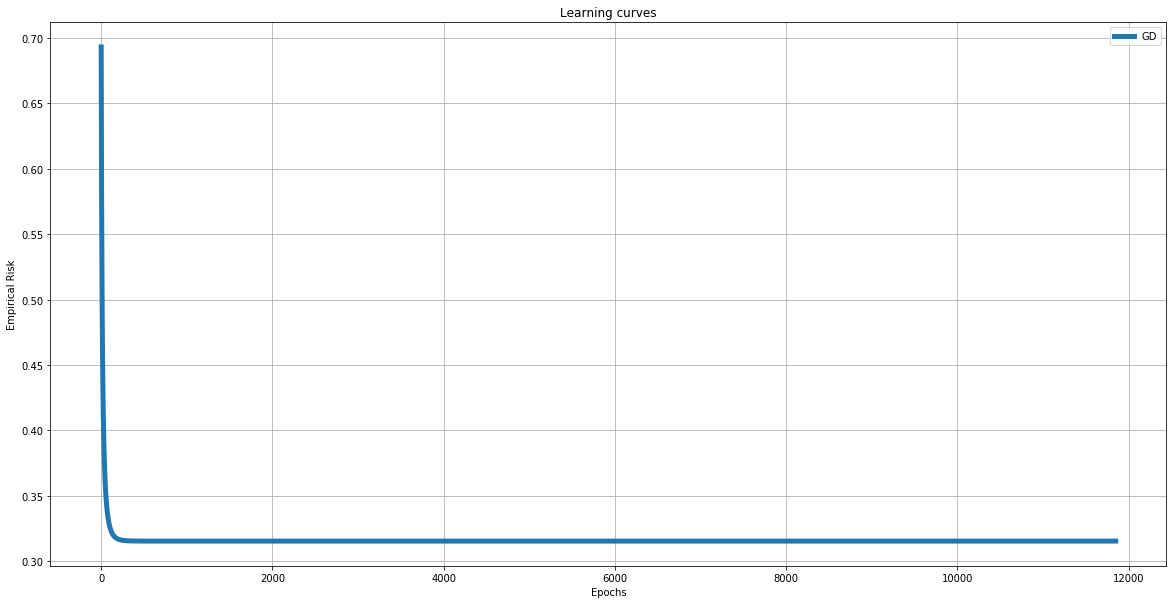

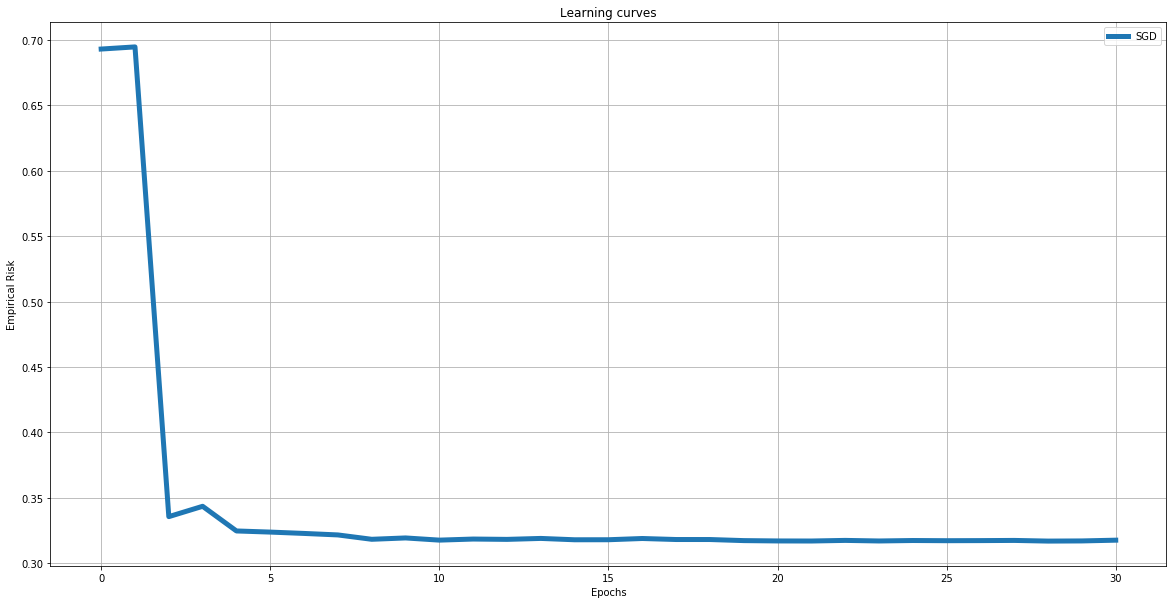

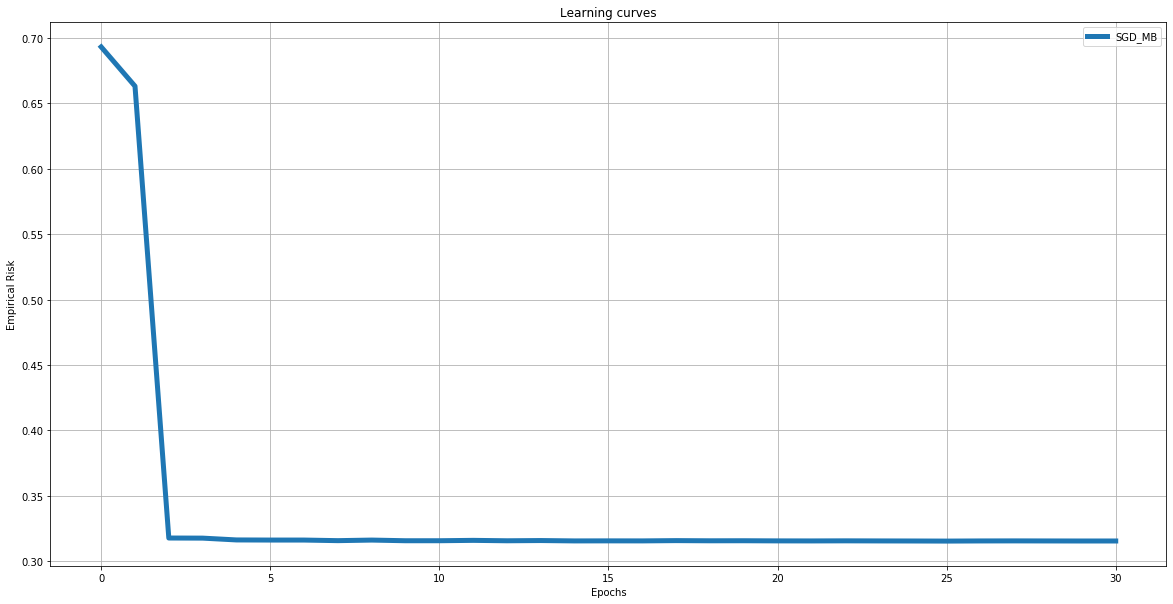

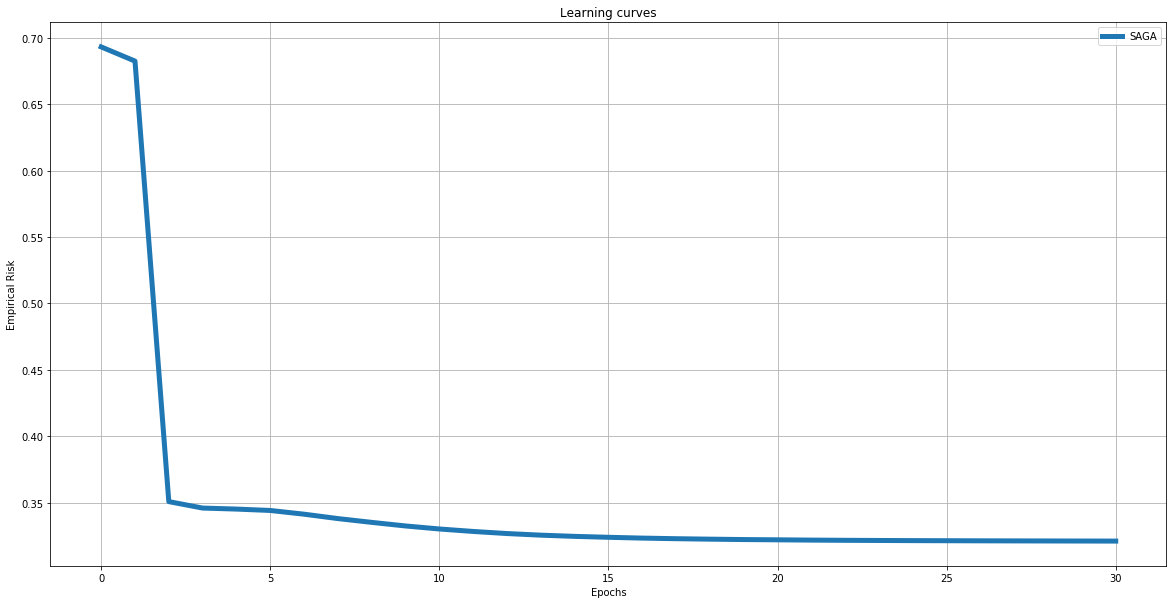

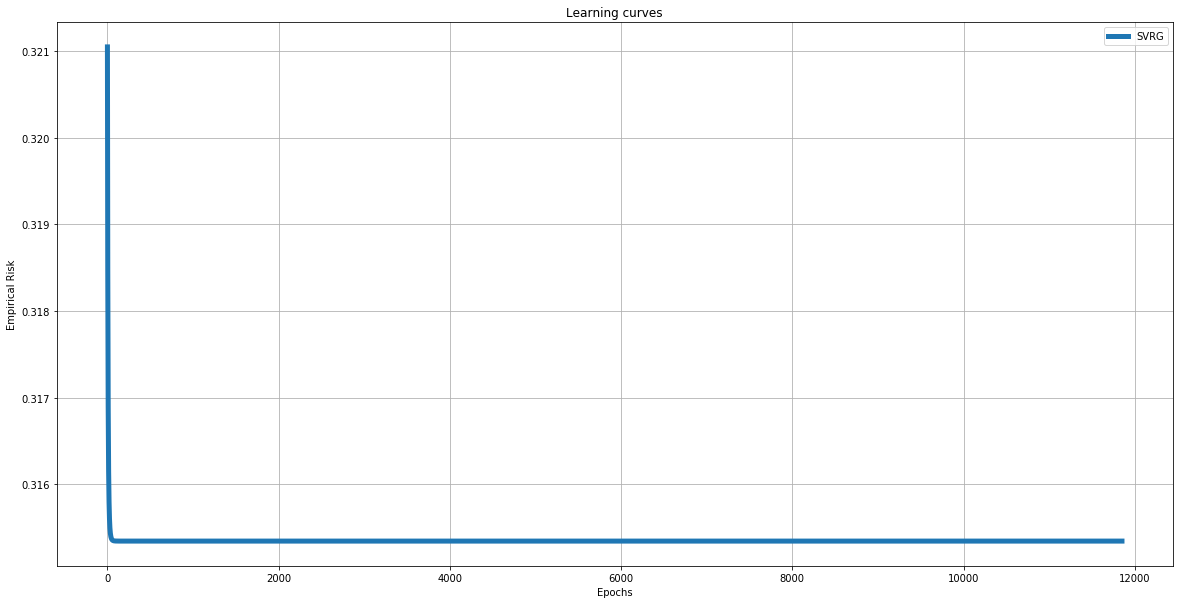

In [38]:
tabs = [g_tab, sg_tab, sg_mb_tab, saga_tab, svrg_tab]
names = ['GD', 'SGD', 'SGD_MB', 'SAGA', 'SVRG']

for tab, name in zip(tabs, names):
    solver.LearningCurve(tab, name)